In [1]:
import chardet
import pandas as pd
import urllib.request

    
#print(encoding_result)
data = pd.read_csv('../../news/scraping_result/en/2018_complement1/2018_complement1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_complement1/2018_complement1_Cointelegraph.csv', encoding='UTF8',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_complement1/2018_complement2_Cointelegraph.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_complement1/2018_complement1_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2018_complement1/2018_complement1_Forbes.csv', error_bad_lines=False))


In [2]:
text = data[['main article']]
text['main article'] = text['main article'].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [21]:
word2id = defaultdict(lambda: 0)

In [22]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [23]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [24]:
len(tf_idf_result)

15780

In [25]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

15780


In [26]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [27]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.000*"embarrass" + 0.000*"dollarwhile" + 0.000*"tasker" + 0.000*"shakeup" + 0.000*"cofounded" + 0.000*"baker" + 0.000*"dethrone" + 0.000*"inexorable"')
(1, '0.000*"hylton" + 0.000*"lithuanian" + 0.000*"futureperfect" + 0.000*"rockefeller" + 0.000*"mccff" + 0.000*"thumbnail" + 0.000*"cheque" + 0.000*"padre"')
(2, '0.000*"cheese" + 0.000*"fifa" + 0.000*"vostok" + 0.000*"excellency" + 0.000*"tallinn" + 0.000*"spinach" + 0.000*"forumtransparency" + 0.000*"patchy"')
(3, '0.000*"korelya" + 0.000*"bakar" + 0.000*"wirex" + 0.000*"jungle" + 0.000*"flik" + 0.000*"pigg" + 0.000*"nydig" + 0.000*"cream"')


In [28]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [29]:
sentences = article_contents

In [30]:
from gensim.models import Word2Vec

In [31]:
model = Word2Vec(sentences, min_count=1)

In [32]:
len(model.wv.vocab)

15780

In [33]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [35]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [36]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [37]:
temp_cluster_result['cluster'] = assigned_clusters

In [38]:
temp_cluster_result['raw_data'] = X.tolist()

In [39]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [40]:
from sklearn.metrics import pairwise_distances

In [41]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [42]:
len(cosine_centroid_list)

15780

In [43]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [44]:
sum(temp_distance[3])

2297.070963547599

In [45]:
import scipy.spatial.distance as dist

In [46]:
dist.cosine(X[0],cosine_centroid_list[0])

0.06613282788185904

In [47]:
dist.euclidean(X[0],cosine_centroid_list[0])

4.469867940213092

In [48]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [49]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [50]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 비즈니스 시도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
31,"[-0.03108251839876175, -1.0491704940795898, -1...",crypto,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.072825,0.247291,0.825534,NaN
8,"[0.24778291583061218, -0.7419828772544861, -1....",cryptocurrency,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.079397,0.157465,0.921932,NaN
1267,"[-0.007185604888945818, 0.013968901708722115, ...",company,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.088141,0.153291,0.934850,NaN
111,"[-0.5462024807929993, -1.4250531196594238, -1....",exchange,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.117708,0.170529,0.947179,NaN
542,"[-0.09399787336587906, -0.38655024766921997, -...",include,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.014120,0.062770,0.951350,NaN
735,"[0.05568050965666771, -0.5644147396087646, -0....",cryptocurrencies,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.074559,0.089053,0.985506,NaN
321,"[-0.28258928656578064, -0.8508476614952087, -1...",security,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.055325,0.068490,0.986835,NaN
148,"[-0.14245344698429108, -0.24657298624515533, -...",state,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.058810,0.070036,0.988774,NaN
196,"[-0.23752455413341522, -0.32899561524391174, -...",risk,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.027930,0.037183,0.990747,NaN
314,"[-0.07887004315853119, -0.2322464883327484, -0...",consider,0,"[-0.018238185, -0.05891284, -0.122292206, -0.0...",0.017043,0.026206,0.990837,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
215,"[0.03701196238398552, 0.21834728121757507, -0....",make,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.030683,0.118969,0.911714,NaN
98,"[0.09692595899105072, -0.08178563416004181, -0...",many,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.019657,0.056431,0.963226,NaN
560,"[0.08205223828554153, 0.0746830627322197, -0.7...",give,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.009548,0.043831,0.965718,NaN
853,"[0.13334551453590393, -0.05114690586924553, -0...",interest,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.010789,0.036564,0.974225,NaN
198,"[0.2978332042694092, 0.11448108404874802, -0.8...",look,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.017640,0.041975,0.975665,NaN
308,"[0.08115974068641663, -0.14287371933460236, -0...",become,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.024268,0.048314,0.975954,NaN
4,"[0.23176094889640808, 0.1762365847826004, -0.7...",find,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.007421,0.030844,0.976577,NaN
1161,"[0.1750316619873047, 0.14488428831100464, -0.8...",explain,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.004900,0.025742,0.979159,NaN
263,"[0.15086351335048676, 0.011487588286399841, -0...",fact,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.001843,0.022495,0.979348,NaN
418,"[0.14241912961006165, -0.050411567091941833, -...",believe,1,"[0.016826406, 0.0031197846, -0.10262182, -0.03...",0.011575,0.031771,0.979803,NaN


In [57]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
506,"[0.33503034710884094, 0.3915133476257324, -0.7...",blockchain,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.147971,0.304108,0.843863,NaN
453,"[-0.002176058478653431, 0.04091497138142586, -...",good,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.008912,0.043521,0.965390,NaN
585,"[0.015764344483613968, 0.1418282687664032, -0....",know,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.016578,0.048778,0.967800,NaN
1165,"[-0.13041754066944122, 0.11649247258901596, -0...",business,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.040171,0.070113,0.970058,NaN
394,"[0.11193942278623581, 0.06559652090072632, -0....",call,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.014082,0.042980,0.971101,NaN
150,"[0.03636618331074715, 0.10788679122924805, -0....",part,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.009123,0.033627,0.975496,NaN
138,"[-0.06401689350605011, 0.028643622994422913, -...",different,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.008050,0.031694,0.976356,NaN
1369,"[0.020737459883093834, 0.24527078866958618, -0...",help,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.022057,0.044294,0.977763,NaN
1013,"[-0.08153678476810455, -0.0824204832315445, -0...",order,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.015400,0.037260,0.978140,NaN
1459,"[-0.15814127027988434, -0.07952116429805756, -...",want,2,"[0.00010248656, 0.0047687, -0.09151567, -0.041...",0.016901,0.036719,0.980182,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 가격, 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
5,"[0.6101691126823425, -0.09454852342605591, -0....",bitcoin,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.128991,0.321192,0.807798,NaN
20,"[0.23486308753490448, -0.6091428995132446, -0....",market,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.078540,0.183516,0.895024,NaN
19,"[0.4352090060710907, -0.19823205471038818, -0....",time,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.043150,0.119046,0.924104,NaN
82,"[0.4045829474925995, -0.10846618562936783, -0....",accord,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.017745,0.059291,0.958454,NaN
170,"[0.24780480563640594, -0.17483492195606232, -0...",move,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.011665,0.049783,0.961883,NaN
152,"[0.35676494240760803, -0.07659713178873062, -0...",term,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.006529,0.035405,0.971124,NaN
252,"[0.3686031401157379, -0.04197954013943672, -0....",follow,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.004939,0.033163,0.971776,NaN
512,"[0.3368794620037079, -0.13555870950222015, -0....",remain,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.002249,0.029839,0.972411,NaN
872,"[0.36420533061027527, -0.12703736126422882, -0...",begin,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.004378,0.031230,0.973148,NaN
51,"[0.2843603491783142, -0.12739472091197968, -0....",first,3,"[0.039646704, -0.013790837, -0.10421641, -0.02...",0.033434,0.059214,0.974220,NaN


In [54]:
y_km = temp_cluster_result['cluster'].values

In [55]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

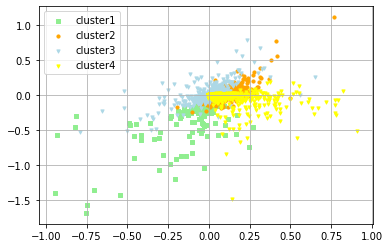

In [56]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 비즈니스 시도

1027

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 협업

9405

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인플

3535

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소 가격

1813

In [64]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 8 # 협업
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 6 # 인플
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소

In [65]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [67]:
kmeans.inertia_

3389.853182263441

In [68]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 1 1 ... 0 0 0]


In [69]:
cluster_values= list(model.wv.vocab)

In [70]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-3389.8528


In [71]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [72]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7457879


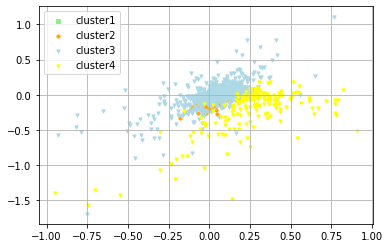

In [73]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [74]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [75]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [76]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [77]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [78]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [79]:
import scipy.spatial.distance as dist

In [80]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [81]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
10453,"[0.006646315101534128, -0.0014011847088113427,...",tcoin,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.027667,0.000077,1.027590,NaN
1875,"[0.006948553025722504, -0.0009226076654158533,...",inflationary,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.028053,0.000232,1.027821,NaN
2168,"[0.003068102290853858, 0.005139772780239582, -...",width,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.028090,0.000155,1.027935,NaN
2984,"[0.005521376151591539, 0.004859169479459524, -...",yermakov,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.028360,0.000077,1.028283,NaN
8108,"[0.009611178189516068, 0.0001522733800811693, ...",mascherano,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.028548,0.000077,1.028470,NaN
15182,"[0.00391706358641386, 0.0018067732453346252, -...",hlavičky,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.028570,0.000077,1.028493,NaN
6652,"[0.005472335498780012, 0.002801705151796341, -...",lever,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.028852,0.000232,1.028620,NaN
8199,"[0.005327444523572922, -0.0011378739727661014,...",watchful,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.029124,0.000155,1.028970,NaN
9957,"[0.007882952690124512, -0.0005577510455623269,...",moto,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.029148,0.000155,1.028994,NaN
4187,"[0.005288970191031694, 0.004667595494538546, -...",kurdish,0,"[0.0051624514, 0.0005427331, -0.034492537, -0....",0.029217,0.000155,1.029063,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3951,"[0.044120196253061295, -0.008180459961295128, ...",session,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.050172,0.002164,1.048007,NaN
3724,"[0.03883112221956253, -0.0003251638263463974, ...",presence,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.058932,0.001778,1.057154,NaN
806,"[0.043948590755462646, -0.002151915105059743, ...",command,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.064091,0.001391,1.062699,NaN
3740,"[0.024113548919558525, -0.015428567305207253, ...",overseas,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.079397,0.002164,1.077233,NaN
5948,"[0.030669016763567924, -0.0053140996024012566,...",minimum,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.080488,0.002164,1.078324,NaN
2298,"[0.05117170512676239, -0.0021544096525758505, ...",unclear,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.087007,0.002706,1.084302,NaN
1063,"[0.032028425484895706, 0.0128898024559021, -0....",flight,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.089077,0.001623,1.087453,NaN
1235,"[0.036237023770809174, 0.013234086334705353, -...",forget,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.091178,0.001855,1.089323,NaN
2194,"[0.036637045443058014, 0.001316658454015851, -...",unlock,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.092446,0.002164,1.090281,NaN
447,"[0.028700711205601692, 0.006752276327461004, -...",charles,1,"[0.038055804, -0.0014153048, -0.26563412, -0.0...",0.094883,0.001933,1.092951,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 긍정적 )

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1959,"[0.039982911199331284, -0.0008202949538826942,...",present,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.169326,0.009663,1.159663,NaN
384,"[0.009552779607474804, -0.025566741824150085, ...",identify,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.170714,0.010513,1.160201,NaN
2371,"[0.07048386335372925, 0.02122294344007969, -0....",promote,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.173123,0.008890,1.164233,NaN
1198,"[0.07646574079990387, 0.06883824616670609, -0....",mind,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.267273,0.008658,1.258615,NaN
2111,"[0.0498870313167572, 0.041108209639787674, -0....",home,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.272885,0.007498,1.265386,NaN
421,"[0.04894319921731949, 0.03742106631398201, -0....",detail,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.287968,0.010822,1.277146,NaN
1621,"[0.03174971789121628, 0.04794665053486824, -0....",structure,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.291459,0.008581,1.282878,NaN
207,"[0.03143356367945671, -0.053967226296663284, -...",lack,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.298846,0.014765,1.284081,NaN
301,"[0.0632971003651619, 0.02328774519264698, -0.6...",simple,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.295731,0.009199,1.286532,NaN
1240,"[0.08208774030208588, 0.02434431202709675, -0....",outline,2,"[0.042053066, -0.002941859, -0.65934515, -0.25...",0.304164,0.007576,1.296589,NaN


In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
307,"[0.281467467546463, -0.1680852472782135, -0.89...",october,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.416471,0.018630,1.397841,NaN
544,"[0.2888738811016083, -0.21275648474693298, -0....",today,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.445117,0.030148,1.414969,NaN
241,"[0.30858707427978516, -0.1640985906124115, -0....",gain,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.558855,0.019789,1.539066,NaN
222,"[0.18688003718852997, -0.2844289243221283, -0....",index,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.595893,0.010127,1.585767,NaN
315,"[0.22468365728855133, -0.20593726634979248, -0...",worth,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.613523,0.019944,1.593579,NaN
986,"[0.277235746383667, -0.1481679528951645, -0.84...",range,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.632134,0.015692,1.616441,NaN
1029,"[0.33599933981895447, -0.06250013411045074, -0...",january,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.671816,0.013837,1.657978,NaN
872,"[0.36420533061027527, -0.12703736126422882, -0...",begin,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.703689,0.031230,1.672459,NaN
316,"[0.18661366403102875, -0.20939628779888153, -0...",note,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.793338,0.035714,1.757625,NaN
289,"[0.09665162116289139, -0.3804970979690552, -0....",trader,3,"[0.24608183, -0.24013263, -0.87649846, -0.1700...",0.786298,0.022495,1.763803,NaN


In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 인플

13010

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 이슈

1802

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 긍정

795

In [99]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #기타

173

In [100]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 1 # 긍정
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 13 # 기타

In [101]:
temp_cluster_result1['result'] = 3 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 3
temp_cluster_result1['Silhouette'] = 0.7457879 
temp_cluster_result['Silhouette'] = 0.7457879
 

In [102]:
temp_cluster_result1.to_csv("../cluster/en_news/2018_complement1/en_news_2018_complement1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2018_complement1/en_news_2018_complement1_cosine.csv")

In [90]:
word_vectors = model.wv

In [91]:
vocabs = word_vectors.vocab.keys()

In [92]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [93]:
print(word_vectors.similarity(w1='little',w2='push'))

0.9926988


In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [95]:
xys

array([[ 4.06137473e+00,  4.77089338e-01],
       [ 8.73687588e-01,  4.20903496e-01],
       [ 1.07056905e+00, -1.73951091e-01],
       ...,
       [-4.95858506e-01,  2.03627495e-02],
       [-5.25965589e-01,  3.21243766e-03],
       [-4.97587825e-01,  3.80593293e-02]])

In [96]:
xys[:,0]

array([ 4.06137473,  0.87368759,  1.07056905, ..., -0.49585851,
       -0.52596559, -0.49758782])

In [97]:
xys[:,1]

array([ 0.47708934,  0.4209035 , -0.17395109, ...,  0.02036275,
        0.00321244,  0.03805933])

In [98]:
xs = xys[:,0]
ys = xys[:,1]

In [95]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 34394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24065 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 34394 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python

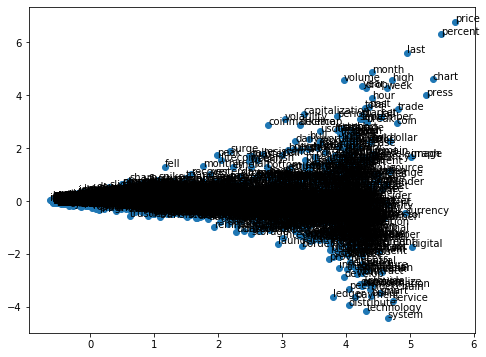

In [96]:
plot_2d_graph(vocabs,xs,ys)

In [97]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>